In this lab excercise you will learn how to do market basket analysis using apriori algorithm. 

Install  __mlxtend__ library from anaconda prompt 


In [1]:
#import all required classes for market basket analysis from mlxtedn library
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#import pandas library 
import pandas as pd

# Example 6

In this example we will read data from csv file

In [2]:
#read data from file
data=pd.read_csv("d:/mdp iitb/arulesdata.csv")

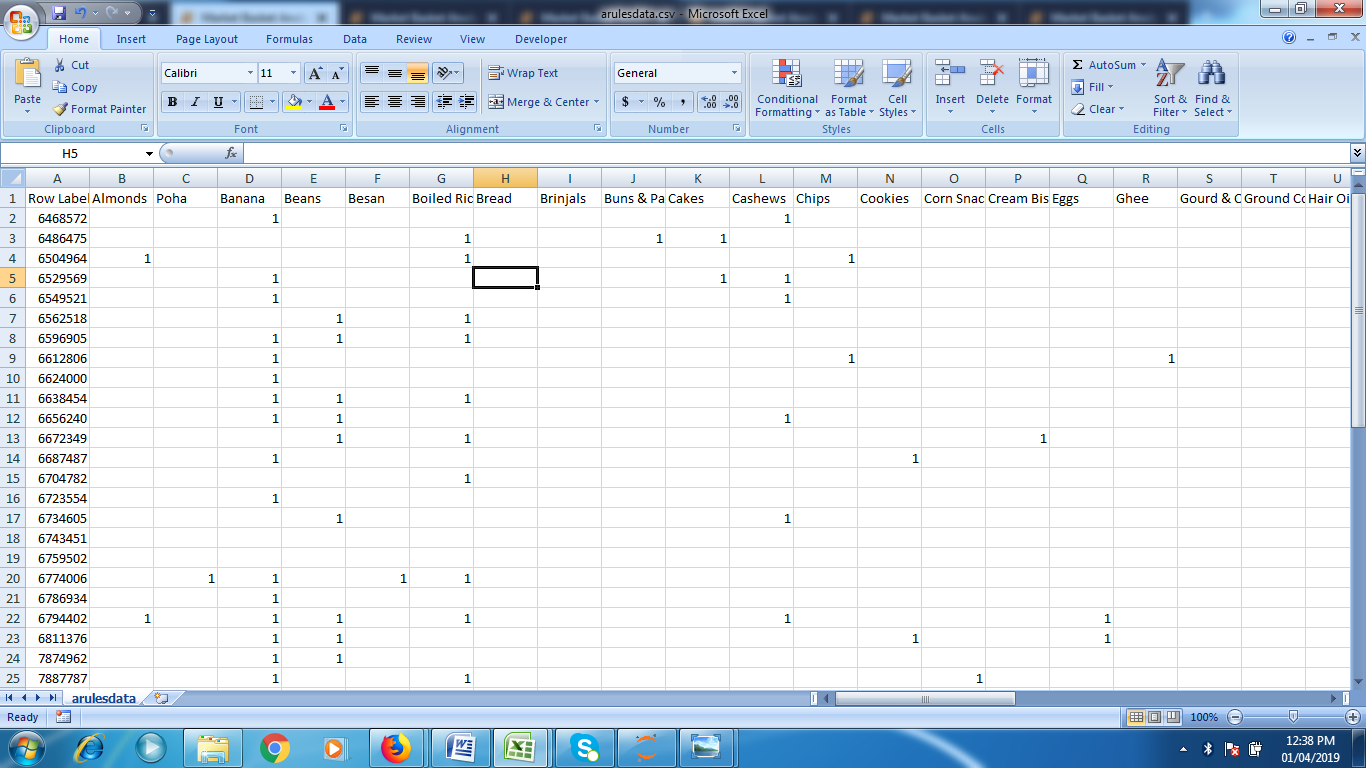

In [3]:
data.shape

(50, 54)

In [4]:
data.head(6)

,Row Labels,Almonds,Poha,Banana,Beans,Besan,Boiled Rice,Bread,Brinjals,Buns & Pavs,...,Sooji & Rava,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Toor Dal,Urad Dal,Utensil Scrub Pads,Washing Bars,Whole Spices
0,6468572,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6486475,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,6504964,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,6529569,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
4,6549521,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6562518,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0


In [5]:
#replace all 1 with True and missing values with False
data = data.applymap(lambda x: True if x >= 1 else False)

In [6]:
data.head(4)

,Row Labels,Almonds,Poha,Banana,Beans,Besan,Boiled Rice,Bread,Brinjals,Buns & Pavs,...,Sooji & Rava,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Toor Dal,Urad Dal,Utensil Scrub Pads,Washing Bars,Whole Spices
0,True,False,False,True,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
1,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
2,True,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,False,False


In [7]:
#dont need first column so ignore it
data=data.iloc[:,1:55]

In [8]:
data.shape

(50, 53)

In [9]:
data.head(5)

,Almonds,Poha,Banana,Beans,Besan,Boiled Rice,Bread,Brinjals,Buns & Pavs,Cakes,...,Sooji & Rava,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Toor Dal,Urad Dal,Utensil Scrub Pads,Washing Bars,Whole Spices
0,False,False,True,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,True,False,True,False,False
2,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,False,True,False,False,True,True,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [10]:
#generate frequent item sets
frequent_itemsets = apriori(data, min_support=0.3, use_colnames=True)

In [11]:
#generate rules
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

In [12]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Namkeen),(Banana),0.42,0.72,0.38,0.904762,1.256614,0.0776,2.940000
1,(Other Vegetables),(Banana),0.38,0.72,0.32,0.842105,1.169591,0.0464,1.773333
2,(Root Vegetables),(Banana),0.44,0.72,0.40,0.909091,1.262626,0.0832,3.080000
3,(Snacky Nuts),(Banana),0.40,0.72,0.36,0.900000,1.250000,0.0720,2.800000
4,(Other Vegetables),(Beans),0.38,0.48,0.32,0.842105,1.754386,0.1376,3.293333
5,(Urad Dal),(Other Dals),0.36,0.50,0.30,0.833333,1.666667,0.1200,3.000000
6,(Urad Dal),(Sugar),0.36,0.50,0.34,0.944444,1.888889,0.1600,9.000000
7,"(Root Vegetables, Beans)",(Banana),0.34,0.72,0.30,0.882353,1.225490,0.0552,2.380000
